This notebook we will first create three classifiers LogisticRegression, KNN, and DecisionTreeClassifier
And use these three classififer to create voting classifier and fit classifier and explaing accuracy report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 42

In [2]:
# Read processe file
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.shape

(21784, 34)

#### Lets separate Level and features, Scaled features

In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create three classifier and fit each 

In [4]:
accuracy_scores = []
# Instantiate individual classifiers
lr = LogisticRegression(n_jobs=-1, random_state=SEED)
knn = KNN(n_jobs=-1)
dt = DecisionTreeClassifier(max_depth=5,random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [5]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)
    print('{:s} : {:.3f}'.format(clf_name, score))

Logistic Regression : 0.640
K Nearest Neighbours : 0.600
Classification Tree : 0.673


### Lets Create a voting classifier and fit

In [6]:
# Instantiate individual classifiers
lr = LogisticRegression(n_jobs=-1, random_state=SEED)
knn = KNN(n_jobs=-1)
dt = DecisionTreeClassifier(max_depth=5,random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

##Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
score = accuracy_score(y_test, y_pred)
accuracy_scores.append(score)
print('Voting Classifier: {:.3f}'.format(score))

Voting Classifier: 0.667


In [7]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.656     0.707     0.680      3276
       Fraud      0.680     0.628     0.653      3260

    accuracy                          0.667      6536
   macro avg      0.668     0.667     0.667      6536
weighted avg      0.668     0.667     0.667      6536



In [8]:
labels = [ cls[0] for cls in classifiers]
labels.append('Voting Classifier')
accuracy_scores =[ round(score, 3) for score in accuracy_scores]

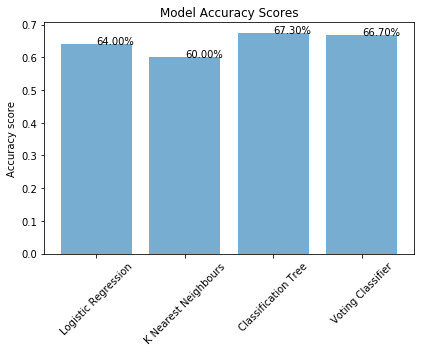

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(labels))

plt.figure(figsize=(6,5))
plt.bar(y_pos, accuracy_scores, align='center', alpha=0.6)
plt.xticks(y_pos, labels, rotation=45)
plt.ylabel('Accuracy score')
plt.title('Model Accuracy Scores')
[plt.text(i, v, '{:.2f}%'.format(100*v)) for i, v in enumerate(accuracy_scores)];
plt.tight_layout()
plt.show()

We see that individual KNeighborsClassifier has high score 96% where as LogisticRegression has score 64% and DecisionTreeClassifier has score 67%. 
Voting Classifier with LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier has score 77%.

#### Save best model

In [10]:
import pickle

lookup ={
    1 : 'Fraud', 0:'Not Fraud'
}

pickle.dump(vc, open('../saved_models/vc_model.pkl','wb'))
model = pickle.load(open('../saved_models/vc_model.pkl','rb'))

#test the model 
pred = model.predict([X_test[0]])
lookup[pred[0]]

'Fraud'

#### Reference 
- https://learn.datacamp.com/courses/machine-learning-with-tree-based-models-in-python